<a href="https://colab.research.google.com/github/MungaiMwangi001/Deep_Learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

**set the input and output data**

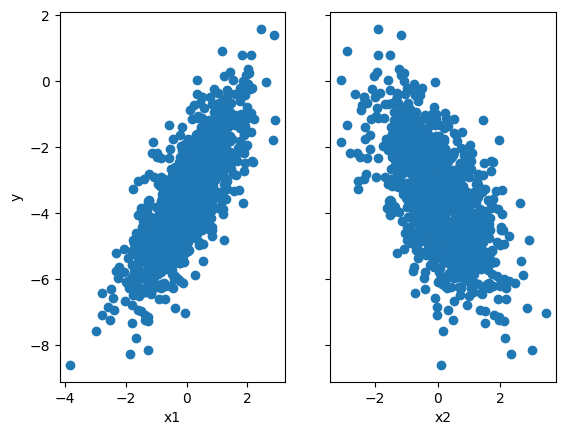

In [12]:
#set  random seed for reproducability
torch.manual_seed(42)

#Set number of samples
num_samples = 1000

#create random features with 2 dimensions
x = torch.randn(num_samples,2)

#create rnadom weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias = torch.tensor([-3.5])

#Target variable
y = x @ true_weights.T + true_bias

#plot the dataset
fig,ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)


ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x2')
plt.show()



In [14]:

#Define the Model

class linearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(linearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)


    def forward(self,x):
        return self.linear(x)

#Define the input and output dimensions
input_dim = x.shape[1]
output_dim = 1

#Create/instantiate  the model
model = linearRegression(input_dim, output_dim)

**manually set the model parameter**



In [15]:
# create a random weight & bias tensor
weight = torch.randn(1, input_dim)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
#nn.Parameter tells PyTorch to treat these as trainable parameters,
#so model.parameters() will include them and optimizers can update them.
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-1.5654, -1.0864]], requires_grad=True)
bias : Parameter containing:
tensor([0.6485], requires_grad=True)


prediction

In [16]:
y_p = model(x)
print(y_p[:5])

tensor([[-3.9837],
        [ 1.5261],
        [ 0.9278],
        [ 2.4593],
        [ 0.0347]], grad_fn=<SliceBackward0>)


**define the loss function**

Here we are calculating the Mean Squared Error by taking the square of the difference between the actual and the predicted value and then dividing it by its length (i.e n = the Total number of output or target values) which is the mean of squared errors.

In [17]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss

tensor(23.7477, grad_fn=<MeanBackward0>)

All the steps which are done till now are known as forward propagation.



**Implementations of the Gradient Descent algorithm for the above model**

Steps:

1. Find the gradient using loss.backward()

2.Get the parameter using model.linear.weight and model.linear.bias

3. Update the parameter using the above-defined equation.

4. Again assign the model parameter to our **model**


#find the gradient using loss.backward()

#learning_rate
learning_rate = 0.001

#model_parameter
w = model.linear.weight
b = model.linear.bias


#mutually update the model parameter
w -= learning_rate * w.grad
b -= learning_rate * b.grad



# assign the weight & bias parameter to the linear layer
model.linear.weight = nn.Parameter(w)
model.linear.bias   = nn.Parameter(b)





Epoch [100/1000], weight[[-1.2760168  -0.88634896]], bias[-0.11193127], loss: 16.7675
Epoch [200/1000], weight[[-1.0400909  -0.72314936]], bias[-0.73430324], loss: 12.0410
Epoch [300/1000], weight[[-0.84775114 -0.5900335 ]], bias[-1.2436539], loss: 8.8794
Epoch [400/1000], weight[[-0.6909501  -0.48145008]], bias[-1.6605076], loss: 6.7645
Epoch [500/1000], weight[[-0.56312686 -0.3928728 ]], bias[-2.0016623], loss: 5.3498
Epoch [600/1000], weight[[-0.45892966 -0.3206115 ]], bias[-2.280866], loss: 4.4035
Epoch [700/1000], weight[[-0.3739953  -0.26165742]], bias[-2.5093665], loss: 3.7704
Epoch [800/1000], weight[[-0.30476543 -0.21355708]], bias[-2.6963742], loss: 3.3470
Epoch [900/1000], weight[[-0.24833855 -0.17430992]], bias[-2.8494244], loss: 3.0637
Epoch [1000/1000], weight[[-0.20234884 -0.14228463]], bias[-2.974682], loss: 2.8742


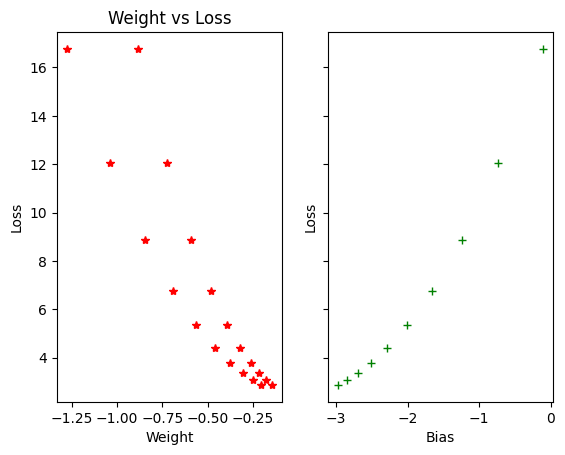

In [18]:
# Number of epochs
num_epochs = 1000

#learning rate
learning_rate = 0.001

# SUBPLOT  WEIGHT & BIAS  VS LOSSES

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)

    # Compute loss
    loss = Mean_Squared_Error(y_p, y)


    # Backpropagation
    loss.backward()

    #learning Rate
    learning_rate = 0.001

    #model parameter
    w = model.linear.weight
    b = model.linear.bias

    #mutually update the modelmodel parameters
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)

    if (epoch+1) % 100 == 0:
       ax1.plot(w.detach().numpy(), loss.item(), 'r*-')
       ax2.plot(b.detach().numpy(), loss.item(), 'g+-')
       print('Epoch [{}/{}], weight{}, bias{}, loss: {:.4f}'.format(
           epoch+1, num_epochs,
           w.detach().numpy(),
           b.detach().numpy(),
           loss.item()))



ax1.set_xlabel('Weight')
ax1.set_ylabel('Loss')
ax1.set_title('Weight vs Loss')

ax2.set_xlabel('Bias')
ax2.set_ylabel('Loss')
plt.show()

**From the above graph and data, we can observe the Losses are decreasing as per the weight and bias variations.**

In [20]:
#optimal weight and bias values

w = model.linear.weight
b = model.linear.bias

print('weight(w) = {} \n bias(b) = {}'.format(
    w.abs(), b.abs()
))

weight(w) = tensor([[0.2023, 0.1423]], grad_fn=<AbsBackward0>) 
 bias(b) = tensor([2.9747], grad_fn=<AbsBackward0>)


In [21]:
#prediction
pred = x @ w.T + b
print(pred[:5])

tensor([[-3.5762],
        [-2.8574],
        [-2.9363],
        [-2.7376],
        [-3.0571]], grad_fn=<SliceBackward0>)
